# Recursive Code by Zhang Tianjun

> The goal of this code is to reproduce the 2011 AER paper “Finance and Development: A Tale of Two Sectors” by modeling a two-sector macro-structural model with financial frictions and solving for the equilibrium price $(w^*,r^*,p_s^ *)$ by the nested bisection method.


# Model

## Talent

We assume that there are a total of $n_s$ values of talent in the individual service industry; there are a total of $n_m$ values of talent in the manufacturing industry.
We construct a state transfer probability matrix $(P)$ of size $(n_s \times n_m)$. For each state $(i)$ and $(j)$, the matrix element $(P[i, j])$ denotes the probability of transferring from state $(i)$ to state $(j)$. The construction of the matrix is based on the following rule:

- If $(j = i)$, then $P[i, j] = \gamma + (1-\gamma) \cdot p_s[j_s] \cdot p_m[j_m]$.
- If $(j \neq i)$, then $ P[i, j] = (1-\gamma) \cdot p_s[j_s] \cdot p_m[j_m] $

where $(j_s)$ and $(j_m)$ are the indexes of $(j)$ in the $(n_s)$ and $(n_m)$ dimensions, respectively:

$$
j_s = j \mod n_s
$$

$$
j_m = [ \frac{j}{n_s} ]
$$

## Preference

An individual's preferences are described by the expected utility function of the following consumption sequence $\{\mathbf{c}_t=(c_{S,t},c_{m,t})\}$:
$$U(c)=\mathbb{E} [\sum_{t=0}^{\infty} \beta^t u(\mathbf{c}_t)]$$
$$u(\mathbf{c}_t) = \frac{1}{1-\sigma}(\psi c_{S,t}^{1-1/\varepsilon} + (1-\psi)c_{m,t}^{1-1/\varepsilon})^{\frac{1-\sigma}{^{1-1/\varepsilon}}}$$
where $\beta$ is the discount factor, $\sigma$ is the coefficient of relative risk aversion (and the inverse of the intertemporal elasticity of substitution), $\varepsilon$ is the intertemporal elasticity of substitution between services and manufactured goods, and $\psi$ controls for the share of services in overall consumption expenditure.
Expectations exceed the realization of entrepreneurial ideas ($\mathbf{z}$), which depends on the random disappearance of ideas ($1-\gamma$) and the distribution of ideas $\mu(\mathbf{z})$.

Since $\varepsilon=1$, the utility function degenerates to the Cobb-Douglas form:
$$
u(c_S,c_m)=\frac{1}{1-\sigma}(c_S^\psi c_m^{1-\psi})^{1-\sigma}
$$


Given total consumption $c$, the consumer's optimal consumption is:

$$
c_S=c\frac{\psi}{p_s},c_m=c_s \frac{p_s(1-\psi)}{\psi}=c(1-\psi)
$$



## Production

At the beginning of each period, an individual with a vector of entrepreneurial ideas $\mathbf{z}$ and wealth $a$ chooses whether to work for wage $w$ or run a business in any sector $j = S,m$.
To operate a business in a given sector, an individual must pay the sector-specific per-period fixed cost $κ_j$ in units of that sector's output. The key assumption is that the fixed cost of operating a business in manufacturing is higher than in services $k_m > k_S$.
Also, we assume that fixed costs need to be paid in each period of operation.

A talented entrepreneur produces with capital ( $k$) and labor ( $l$) after paying the fixed costs with the following production function:
$$zf(k,l)=\ zk^{\alpha}l^{\theta}$$

## Credit Market and collateral constraint


Individuals have access to competitive financial intermediaries that take deposits, lease capital $k$ to entrepreneurs at an interest rate $R$, and lend to entrepreneurs at a fixed cost $p_j \kappa_j$.
In this paper, we assume that both lending and capital leasing take place over a period of time, i.e., that the financial wealth of individuals is non-negative ($a\geq 0$).
The intermediary's zero profit condition implies that $R = r + \delta$, where $r$ is the interest rate on deposits and loans and $\delta$ is the depreciation rate.

Entrepreneurial borrowing and capital renting are constrained by the incomplete enforceability of the contract. In particular, we assume that the entrepreneur may break the covenant after production has occurred.
In this case, the entrepreneur gets to keep the $1 - \phi$ portion of net undepreciated capital and labor compensation income:

$$
(1-\phi)[p_jz_jf(k,l)-wl+(1-\delta)k],\phi \in [0,1]
$$

The only penalty is the seizure of its financial assets deposited with the financial intermediary, $a$. Over the next period, defaulting entrepreneurs regain access to financial markets and are not treated any differently regardless of the history of default.
Note that the $\phi$ index refers to the strength of the legal institutions that enforce contractual obligations in an economy.
This one-dimensional parameter captures the extent of financial market frictions due to imperfect enforcement of credit and lease contracts. This succinct specification allows for flexible modeling of finite commitments: $\phi=1$ corresponds to a perfect credit market; $\phi=0$ corresponds to an economy with no credit.

We consider equilibria in which the borrowing contract and the capital lease contract are incentive compatible and therefore satisfied. In particular, we study equilibria in which the rent of capital is quantitatively limited by an upper bound $\bar{k}^j(a,\mathbf{z};\phi)$ that is related to the state of the individual $(a,\mathbf{z})$ and the sector in which the business is started.
At this point, the incentive compatibility condition is:

$$
\max_l \{ p_jz_jf(k,l)-wl \} -Rk-(1+r)p_j \kappa_j+(1+r)a \geq (1-\phi)[\max_l \{ p_jz_jf(k,l)-wl \}+(1-\delta)k]
$$.

The above condition stipulates that the entrepreneur must end up with (weakly) more economic resources when he fulfills his credit and rent obligations (left-hand side) than when he defaults (right-hand side). This static condition is sufficient to characterize the executable allocation, since we assume that the defaulting entrepreneur regains full access to financial markets in the following period.



Due to the imperfections in the credit market at this time, entrepreneurs may not be able to choose the globally optimal level of capital and may not even be able to start a business.

In this regard, we need to further analyze the incentive compatibility condition:
$$\max_l \{ p_jz_jf(k,l)-wl \} -Rk-(1+r)p_j \kappa_j+(1+r)a \geq (1-\phi)[\max_l \{ p_jz_jf(k,l)-wl \}+(1-\delta)k]$$
We shift the terms to get:
$$\phi \max_l \{ p_jz_jf(k,l)-wl \} -Rk-(1+r)p_j \kappa_j+(1+r)a - (1-\phi)(1-\delta)k\geq 0 \qquad (*)$$
For the part $$\max_l \{ p_jz_jf(k,l)-wl \}$$, we can find $$l^*(k)=(\frac{p \theta z k^\alpha}{w})^{1/(1-\theta)}$$.
Thereby the left equation can be considered as a function of $g(a,\mathbf{z};k)$ and is concave with respect to $k$, given $(a,\mathbf{z})$, the left equation has a global maximum point $k_{max}=\left( \frac{(r + \delta) + (1 - \delta)(1 - \phi)}{\left( \phi \alpha w \left( \frac{p \theta z}{w} \right)^{\frac{1}{1 - \theta}} \right) } \right)^{\frac{1}{( \frac{\alpha}{1 - \theta } ) - 1}}$. Based on these properties, we can get the capital bound and find enterpreneurs' capital requirement according to KKT conditions:

- First, calculate the maximum point $k^*$ of the left-hand side of $ (*)$.
- Let $k=k^*$:
    - If the left-hand side of $ (*)$ is less than 0, the individual has no incentive to start a business, $\bar{k}=0$.
    - If the left-hand side of  $(*)$ is greater than 0, search to the right from $k^*$ for the zero point of the left-hand side of  $(*)$, which is the boundary point of the collateral constraint $\bar{k}$.
- The capital demand is derived by taking the minimum of the globally optimal capital and the capital bound $\bar{k}$

Just note that the process of solving the incentive-compatible boundary uses scipy\_optimize, which cannot be accelerated by njit compilation, so I pre-calculated the incentive-compatible boundary, the
Then input it as a parameter to the main code part of the compilation acceleration to get the capital demand of the entrepreneur and the corresponding labor demand.

## Recursive form of individual problem


The recursive form of the individual problem is as follows:
$$
v(a,\mathbf{z})=\max\{v^W(a,\mathbf{z}),v^m(a,\mathbf{z}),v^S(a,\mathbf{z})\}
$$

where：
$$
v^W(a,\mathbf{z}) = \max_{c,a' \geq 0} \{u(\mathbf{c}) + \beta[\gamma v(a',\mathbf{z}) + (1-\gamma)\mathbb E_{\mathbf{z}'}(v(a',\mathbf{z}'))]\}
$$

$$
s.t. \ \mathbf{pc}+a'\leq w+(1+r)a \ ,\ a\geq 0
$$

$$
v^j(a,\mathbf{z}) = \max_{c,a',k,l} \{u(\mathbf{c}) + \beta[\gamma v(a',\mathbf{z}) + (1-\gamma)\mathbb E_{\mathbf{z}'}(v(a',\mathbf{z}'))]\}，j=\{S,m\}
$$

$$
s.t. \ \mathbf{pc}+a'\leq p_jz_jf(k,l)-Rk-wl-(1+r)\kappa_j+(1+r)a \ ,\ a\geq 0,
$$

$$k \leq \bar{k}^j(a,\mathbf{z};\phi)$$


## Competitive equilibrium


The competitive equilibrium in this paper is defined as follows:
- Individual problems achieve optimization
- Financial market constraints satisfied: $k \leq \bar{k}^j(a,\mathbf{z};\phi)$
- Market clearing (credit market, labor market, manufactured goods market, service goods market)
- Joint distribution of individual states $G(a,\mathbf{z})$ is stable

## Algorithm digest

This code deals with three parts:
- Market supply and demand at a given market price $(w,r,p_s)$
    - Solve the steady state using the value function iteration method
    - Solve the stable distribution of individual states using the policy function corresponding to the steady state.
        - because the transition matrix is sparse, we can use sparse matrix to accelerate the calculation.
    - Solve stable supply and demand using stable distributions
- Aiyagari's nested bisection method to find the equilibrium price $(w,r,p_s)$
    -  given $(r^*,p_s^*)$ and $(w_{min},w_{max})$ ,find equilibrium wage $w^*$ using bisection method;
    - given $p_s^*$, compute the demand and supply in credit market and get the difference between demand and supply. 
    If the difference is greater than 0, increase $r^*$ by bisection method; otherwise, decrease $r^*$ by bisection method. Then get $r_{new}$ and
    repeat step 1 using $(r_{new},p_s^*)$ until credit market clears.
    - given $p_s^*$ and $(w^*,r^*)$ from Step 1 and 2, compute the government budget.If the budget is greater than 0, decrease $p_s^*$ by bisection method; otherwise, increase $p_s^*$ by bisection method.
    - Repeat Step 2 until credit market clears.
- Recheck in goods market
    - compute demand and supply in manufacture market by $(w_{eq},r_{eq},p_{s_{eq}})$ and check if clear.

# Code

## Individual characteristics

In [1]:
# import packages
import timeit
import numpy as np
from numba import njit,prange
import numba
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [2]:
# parameters setting
# tech
alpha=0.3
theta=0.49
fc_m=4.68
fc_s=0

# depreciation
delta=0.06

# describing the process for entrepreneurial talent
gamma=0.89
eta=4.84

# discount factor
beta=0.92

# relative risk aversion
sigma=1.5

# intratemporal elasticity of substitution
epsilon=1

# service share in consumption
psi=0.91



In [3]:
# imperfect financial market
phi=0.8

In [4]:
# capital distribution
kmin = 0
kmax = 250
n_k = 250
kgrid = np.linspace(kmin, kmax, n_k)  # asset distribution
# talent distribution
from scipy.stats import pareto
def discrete_pareto(shape,lower_bound,upper_bound,grid_numder):
    ability=np.linspace(pareto.ppf(lower_bound,shape),pareto.ppf(upper_bound,shape),(grid_numder+1))  # 可
    probability=np.diff(pareto.cdf(ability,shape)) / (upper_bound-lower_bound)
    zgrid = ability[1:]
    return zgrid,probability
sgrid,ps = discrete_pareto(4.84,0.6,0.99,10)  # talent in service
mgrid,pm = discrete_pareto(4.84,0.8,0.999,20)  # talent in manufacture
n_s = len(sgrid)
n_m = len(mgrid)
P=np.zeros((n_s*n_m, n_s*n_m))
for i in range(n_s*n_m):
    for j in range(n_s*n_m):
        j_s = j % n_s
        j_m = j // n_s
        if j==i:
            P[i,j]=gamma+(1-gamma)*ps[j_s]*pm[j_m]
        if j!=i:
            P[i,j]=(1-gamma)*ps[j_s]*pm[j_m]
# initial value function
V0 = np.zeros((n_k, n_s*n_m))

In [5]:
sgrid

array([1.34653508, 1.48464708, 1.62275908, 1.76087108, 1.89898308,
       2.03709508, 2.17520708, 2.31331908, 2.45143108, 2.58954308])

In [6]:
mgrid

array([1.53312053, 1.67175143, 1.81038232, 1.94901322, 2.08764412,
       2.22627501, 2.36490591, 2.50353681, 2.6421677 , 2.7807986 ,
       2.91942949, 3.05806039, 3.19669129, 3.33532218, 3.47395308,
       3.61258398, 3.75121487, 3.88984577, 4.02847667, 4.16710756])

In [7]:
ps

array([0.41817518, 0.22878009, 0.13247569, 0.08039881, 0.05075949,
       0.03314483, 0.02228138, 0.01536311, 0.01083185, 0.00778957])

In [8]:
pm

array([0.36975617, 0.21744255, 0.13368229, 0.08533176, 0.05624843,
       0.03812425, 0.0264768 , 0.01878686, 0.01358715, 0.00999571,
       0.00746736, 0.00565656, 0.00433931, 0.0033674 , 0.00264093,
       0.00209141, 0.00167116, 0.00134649, 0.00109329, 0.0008941 ])

## Find equilibrium and compute supply & demand

In [9]:
# utility
def u(c_s,c_m):
    c = c_s + c_m
    if c > 0:
        res = (1/(1-sigma))*(((c_s)**psi+(c_m)**(1-psi))**(1-sigma))
    else:
        res = -np.inf
    return res
if compile:
    u = njit(u)


# worker's budget
def budget_worker(a, x, w, r):
    return w + (1+r)*a - x
if compile:
    budget_worker = njit(budget_worker)

# service production
def f_s(z_index, k, l):
    i_s = z_index % n_s
    f = sgrid[i_s]*(k**alpha)*(l**theta)
    return f
if compile:
    f_s = njit(f_s)

# budget of entrepreneur in service
@njit
def budget_s(z_index, k, l, a , x , w, r, p_s):
    R = r + delta
    return p_s*f_s(z_index, k, l) + (1+r)*a - R*k - w*l - x - (1+r)*fc_s

# LHS of (*) for service
@njit
def capital_constraint_s(k, z_index, a_index , w, r, p_s):
    R=r+delta
    i_s = z_index % n_s
    f=phi*(1-theta)*w*(p_s*theta*sgrid[i_s]*k**alpha/w)**(1/(1-theta))+(1+r)*kgrid[a_index]-R*k-(1+r)*fc_s-(1-phi)*(1-delta)*k
    return f


# manufacture production
def f_m(z_index, k, l):
    i_m = z_index // n_s
    f = mgrid[i_m]*(k**alpha)*(l**theta)
    return f
if compile:
    f_m = njit(f_m)

# budget of entrepreneur in manufacture
@njit
def budget_m(z_index, k, l, a , x , w, r):
    R = r + delta
    return f_m(z_index, k, l) + (1+r)*a - R*k - w*l - x - (1+r)*fc_m

# LHS of (*) for manufacture
@njit
def capital_constraint_m(k, z_index, a_index , w, r):
    R=r+delta
    i_m = z_index // n_s
    f=phi*(1-theta)*w*(theta*mgrid[i_m]*k**alpha/w)**(1/(1-theta))+(1+r)*kgrid[a_index]-R*k-(1+r)*fc_m-(1-phi)*(1-delta)*k
    return f


In [10]:
# Keep capital_bound_matrix as a pure Python function We just need to accelerate the main line!!!!
# Pass the result of the computation as an argument: in functions that require Numba acceleration, avoid calling non-acceleratable functions directly, 
# and pass the result of the computation (e.g. bound_matrix and opt_matrix) as an argument. (Stripped from the main thread).

# entrepreneurs' collateral constraint
def m_capital_bound_matrix(w, r):
    bound_matrix = np.zeros((n_k, n_s*n_m))
    for a_index in range(n_k):
        for z_index in range(n_s*n_m):
            i_m = z_index // n_s
            k_max = (((r+delta)+(1-delta)*(1-phi))/((phi*w*alpha*(theta*mgrid[i_m]/w)**(1/(1-theta)))))**(1/((alpha/(1-theta))-1))
            res = capital_constraint_m(k_max, z_index, a_index , w, r)
            if res < 0 :
                bound_matrix[a_index,z_index]=0
            if res == 0 :
                bound_matrix[a_index,z_index]=k_max
            if res > 0 :
                solution = brentq(capital_constraint_m, k_max,1e+10, args=(z_index, a_index, w, r))
                bound_matrix[a_index,z_index] = solution
    return  bound_matrix
    
def s_capital_bound_matrix(w, r, p_s):
    bound_matrix = np.zeros((n_k, n_s*n_m))
    for a_index in range(n_k):
        for z_index in range(n_s*n_m):
            i_s = z_index % n_s
            k_max = (((r+delta)+(1-delta)*(1-phi))/((phi*w*alpha*(p_s*theta*sgrid[i_s]/w)**(1/(1-theta)))))**(1/((alpha/(1-theta))-1))
            res = capital_constraint_s(k_max, z_index, a_index , w, r, p_s)
            if res < 0 :
                bound_matrix[a_index,z_index]=0
            if res == 0 :
                bound_matrix[a_index,z_index]=k_max
            if res > 0 :
                solution = brentq(capital_constraint_s, k_max,1e+10, args=(z_index, a_index, w, r, p_s))
                bound_matrix[a_index,z_index] = solution
    return  bound_matrix

In [11]:
# worker's value function
def V_current_worker(k_next_index, k_index, z_index, V_next, w, r, p_s):
    c = budget_worker(kgrid[k_index], kgrid[k_next_index], w, r)
    c_s = c*psi/p_s
    c_m = c*(1-psi)
    EV = np.sum(P[z_index,:]*V_next[k_next_index,:]) # expectation
    res = u(c_s,c_m) + beta*(gamma*V_next[k_next_index,z_index]+(1-gamma)*EV)
    return res
if compile:
    V_current_worker = njit(V_current_worker)

def V_max_worker(k_index, z_index, k_start, V, w, r, p_s):
    V_max = -np.inf
    for j in range(k_start,n_k):
        k_next = kgrid[j]
        V_new=V_current_worker(j,k_index,z_index, V, w, r, p_s)
        if V_new > V_max:
            V_max = V_new
            g_k = k_next
            k_start = j
        else:break
    return V_max, g_k, k_start
if compile:
    V_max_worker = njit(V_max_worker)

    
# service entrepreneur's value function
@njit
def s_capital_opt_unconditional(k_index, z_index, w, r, p_s):
    R = r + delta
    i_s = z_index % n_s
    opt = ((R / (alpha *p_s * sgrid[i_s])) * (w * alpha / (R * theta)) ** theta) ** (1 / (alpha + theta - 1))
    return opt

@njit
def s_capital_demand(k_index, z_index, w, r, p_s, bound_matrix):
    if bound_matrix[k_index, z_index] > s_capital_opt_unconditional(k_index, z_index, w, r, p_s):
        capital_demand = s_capital_opt_unconditional(k_index, z_index, w, r, p_s)
    else:
        capital_demand = bound_matrix[k_index, z_index]
    return capital_demand


@njit
def s_V_current_entrepreneur(k_next_index, k_index, z_index, V_next, w, r,  p_s, bound_matrix):
    i_s = z_index % n_s
    k = s_capital_demand(k_index, z_index, w, r, p_s, bound_matrix)
    l = (p_s*theta*sgrid[i_s]*(k**alpha)/w)**(1/(1-theta))
    c = budget_s(z_index, k, l, kgrid[k_index], kgrid[k_next_index], w, r, p_s)
    c_s = c*psi/p_s
    c_m = c_s*(1-psi)
    EV = np.sum(P[z_index, :] * V_next[k_next_index, :])  # expectation
    res = u(c_s,c_m) + beta * (gamma * V_next[k_next_index, z_index] + (1 - gamma) * EV)
    return res

@njit
def s_V_max_entrepreneur(k_index, z_index, k_start, V, w, r, p_s, bound_matrix):
    V_max = -np.inf
    for j in range(k_start, n_k):
        k_next = kgrid[j]
        V_new = s_V_current_entrepreneur(j, k_index, z_index, V, w, r, p_s, bound_matrix)
        if V_new > V_max:
            V_max = V_new
            g_k = k_next
            k_start = j
        else:
            break
    return V_max, g_k, k_start

# manufacture entreprenueur's value function
@njit
def m_capital_opt_unconditional(k_index, z_index, w, r):
    R = r + delta
    i_m = z_index // n_s
    opt = ((R / (alpha * mgrid[i_m])) * (w * alpha / (R * theta)) ** theta) ** (1 / (alpha + theta - 1))
    return opt

@njit
def m_capital_demand(k_index, z_index, w, r, bound_matrix):
    if bound_matrix[k_index, z_index] > m_capital_opt_unconditional(k_index, z_index, w, r):
        capital_demand = m_capital_opt_unconditional(k_index, z_index, w, r)
    else:
        capital_demand = bound_matrix[k_index, z_index]
    return capital_demand

@njit
def m_V_current_entrepreneur(k_next_index, k_index, z_index, V_next, w, r,  p_s, bound_matrix):
    i_m = z_index // n_s
    k = m_capital_demand(k_index, z_index, w, r, bound_matrix)
    l = (theta*mgrid[i_m]*(k**alpha)/w)**(1/(1-theta))
    c = budget_m(z_index, k, l, kgrid[k_index], kgrid[k_next_index], w, r)
    c_s = c*psi/p_s
    c_m = c_s*(1-psi)
    EV = np.sum(P[z_index, :] * V_next[k_next_index, :])  # expectation
    res = u(c_s,c_m) + beta * (gamma * V_next[k_next_index, z_index] + (1 - gamma) * EV)
    return res

@njit
def m_V_max_entrepreneur(k_index, z_index, k_start, V, w, r, p_s, bound_matrix):
    V_max = -np.inf
    for j in range(k_start, n_k):
        k_next = kgrid[j]
        V_new = m_V_current_entrepreneur(j, k_index, z_index, V, w, r, p_s, bound_matrix)
        if V_new > V_max:
            V_max = V_new
            g_k = k_next
            k_start = j
        else:
            break
    return V_max, g_k, k_start

# put together to find the optimal job choice
def V_update(V, w, r, p_s, bound_matrix_s, bound_matrix_m):
    V_new = np.zeros((n_k, n_s*n_m))
    g_new = np.zeros((n_k, n_s*n_m))
    state_manufacture = np.zeros((n_k, n_s*n_m))
    state_service = np.zeros((n_k, n_s*n_m))
    for i_z in prange(n_s*n_m):
        k_start_worker=0
        k_start_manufacture=0
        k_start_service=0
        for i_k in range(n_k):
            V_new_worker, g_new_worker,k_start_worker= V_max_worker(i_k, i_z, k_start_worker, V, w, r, p_s)
            V_new_manufacture, g_new_manufacture,k_start_manufacture= m_V_max_entrepreneur(i_k, i_z, k_start_manufacture, V, w, r, p_s, bound_matrix_m)
            V_new_service, g_new_service,k_start_service= s_V_max_entrepreneur(i_k, i_z, k_start_service, V, w, r, p_s, bound_matrix_s)
            if V_new_service> V_new_manufacture and V_new_service > V_new_worker:
                V_new[i_k, i_z]=V_new_service
                g_new[i_k, i_z]=g_new_service
                state_service[i_k, i_z]=1
            if V_new_manufacture > V_new_service and V_new_manufacture > V_new_worker:
                V_new[i_k, i_z]=V_new_manufacture
                g_new[i_k, i_z]=g_new_manufacture
                state_manufacture[i_k, i_z]=1
            if V_new_worker > V_new_service and V_new_worker > V_new_manufacture:
                V_new[i_k, i_z]=V_new_worker
                g_new[i_k, i_z]=g_new_worker
    return V_new, g_new, state_manufacture, state_service
if compile:
    V_update = njit(V_update,parallel=True)

# find equilibrium by value function iteration method
def V_iteration(V_initial,tol,w,r,p_s):
    V = V_initial
    error = np.inf
    bound_matrix_s=s_capital_bound_matrix(w,r,p_s)
    bound_matrix_m=m_capital_bound_matrix(w,r)
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        V_new, g_new, state_manufacture, state_service = V_update(V, w, r,p_s, bound_matrix_s, bound_matrix_m)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
    return V_new, g_new, state_manufacture , state_service

In [12]:
# construct transition matrix Q of agents' characteristics (asset,z_s,z_m)
from scipy import sparse
def transQ_sparse(g):
    n_k, n_s = g.shape
    n = n_k * n_s
    row_indices = []
    col_indices = []
    values = []
    for j in numba.prange(n):
        i_k = j // n_s
        i_s = j % n_s
        diff = np.abs(g[i_k, i_s] - kgrid)
        mark = np.argmin(diff)
        j_prime_start = mark * n_s
        
        row = np.full(n_s, j)
        col = np.arange(j_prime_start, j_prime_start + n_s)
        val = P[i_s, :]
        
        row_indices.extend(row)
        col_indices.extend(col)
        values.extend(val)
    Q = sparse.csr_matrix((values, (row_indices, col_indices)), shape=(n, n))
    return Q

# compute steady joint distribution of agents' characteristics (asset,z_s,z_m)
import scipy.sparse as sp
def sparse_stationary_distribution_iteration(P, psi0, tol):
    P_csc = sp.csc_matrix(P.T)
    err = np.inf
    max_iter = 1000
    iter = 0
    while iter < max_iter and err > tol:
        psi = P_csc.dot(psi0)
        err = np.max(np.abs(psi - psi0))
        iter = iter + 1
        psi0 = psi
    return psi0

# compute steady marginal distributions of asset
def capital_marginal(joint_dist):
    tmp = joint_dist.reshape((n_k, n_s*n_m))
    k_marginal = tmp.sum(axis=1)
    return k_marginal

# axis = 0 is column (given z), axis = 1 is row(given k)



In [13]:
# Compute Demand and Supply in 3 markets (labor,capital,service) to find equilibrium price (w,r,p_s)
def capital_and_labor_and_service(w,r,p_s):
    bound_matrix_s=s_capital_bound_matrix(w,r,p_s)
    bound_matrix_m=m_capital_bound_matrix(w,r)
    V0 = np.zeros((n_k, n_s*n_m))
    V_new,g,state_manufacture,state_service=V_iteration(V0,1e-7,w,r,p_s)
    Q=transQ_sparse(g)
    psi0 = np.ones((n_k * n_s*n_m))/(n_k * n_s*n_m)
    ss=sparse_stationary_distribution_iteration(Q,psi0,1e-6)
    tmp = ss.reshape((n_k, n_s*n_m))
    state_worker=np.ones((n_k, n_s*n_m))-state_manufacture-state_service
    capital_supply=k_demand=labor_supply=l_demand=service_supply=service_demand=0
    for i_k in range(n_k):
        for i_z in range(n_s*n_m):
            capital_supply += tmp[i_k,i_z]*g[i_k,i_z]
            labor_supply += state_worker[i_k,i_z]*tmp[i_k,i_z]
            i_s = i_z % n_s
            i_m = i_z // n_s
            k_m=m_capital_demand(i_k, i_z, w, r, bound_matrix_m)*state_manufacture[i_k,i_z]
            k_s=s_capital_demand(i_k, i_z, w, r, p_s, bound_matrix_s)*state_service[i_k,i_z]
            k_demand += (k_m+k_s)*tmp[i_k,i_z]
            l_m = (theta*mgrid[i_m]*(k_m**alpha)/w)**(1/(1-theta))
            l_s = (p_s*theta*sgrid[i_s]*(k_s**alpha)/w)**(1/(1-theta))
            l_demand += (l_m+l_s)*tmp[i_k,i_z]
            service_demand += (psi/p_s)*tmp[i_k,i_z]*(budget_worker(kgrid[i_k], g[i_k,i_z], w, r)*state_worker[i_k,i_z]+budget_s(i_z,k_s,l_s,kgrid[i_k],g[i_k,i_z],w,r,p_s)*state_service[i_k,i_z]+budget_m(i_z,k_m,l_m,kgrid[i_k],g[i_k,i_z],w,r)*state_manufacture[i_k,i_z])
            service_supply += state_service[i_k,i_z]*tmp[i_k,i_z]*f_s(i_z,k_s,l_s)
    return capital_supply,k_demand,labor_supply,l_demand,service_supply,service_demand


# Compute Demand and Supply in all markets (labor,capital,service,manufacture) for final check
def capital_and_labor_and_service_and_manufacture(w,r,p_s):
    bound_matrix_s=s_capital_bound_matrix(w,r,p_s)
    bound_matrix_m=m_capital_bound_matrix(w,r)
    V0 = np.zeros((n_k, n_s*n_m))
    V_new,g,state_manufacture,state_service=V_iteration(V0,1e-7,w,r,p_s)
    Q=transQ_sparse(g)
    psi0 = np.ones((n_k * n_s*n_m))/(n_k * n_s*n_m)
    ss=sparse_stationary_distribution_iteration(Q,psi0,1e-6)
    tmp = ss.reshape((n_k, n_s*n_m))
    state_worker=np.ones((n_k, n_s*n_m))-state_manufacture-state_service
    capital_supply=k_demand=labor_supply=l_demand=service_supply=service_demand=m_demand=m_supply=fixed_cost=budget=0
    for i_k in range(n_k):
        for i_z in range(n_s*n_m):
            capital_supply += tmp[i_k,i_z]*g[i_k,i_z]
            labor_supply += state_worker[i_k,i_z]*tmp[i_k,i_z]
            i_s = i_z % n_s
            i_m = i_z // n_s
            k_m=m_capital_demand(i_k, i_z, w, r, bound_matrix_m)*state_manufacture[i_k,i_z]
            k_s=s_capital_demand(i_k, i_z, w, r, p_s, bound_matrix_s)*state_service[i_k,i_z]
            k_demand += (k_m+k_s)*tmp[i_k,i_z]
            l_m = (theta*mgrid[i_m]*(k_m**alpha)/w)**(1/(1-theta))
            l_s = (p_s*theta*sgrid[i_s]*(k_s**alpha)/w)**(1/(1-theta))
            l_demand += (l_m+l_s)*tmp[i_k,i_z]
            budget += tmp[i_k,i_z]*(budget_worker(kgrid[i_k], g[i_k,i_z], w, r)*state_worker[i_k,i_z]+budget_s(i_z,k_s,l_s,kgrid[i_k],g[i_k,i_z],w,r,p_s)*state_service[i_k,i_z]+budget_m(i_z,k_m,l_m,kgrid[i_k],g[i_k,i_z],w,r)*state_manufacture[i_k,i_z])
            service_supply += state_service[i_k,i_z]*tmp[i_k,i_z]*f_s(i_z,k_s,l_s)
            m_supply += state_manufacture[i_k,i_z]*tmp[i_k,i_z]*f_m(i_z,k_m,l_m)
            fixed_cost += state_manufacture[i_k,i_z]*tmp[i_k,i_z]*fc_m
    service_demand = (psi/p_s)*budget
    m_demand = (1-psi)*budget
    return capital_supply,k_demand,labor_supply,l_demand,service_supply,service_demand,m_supply,m_demand,fixed_cost

## Try code：given price, compute supply and demand

In [14]:
w= 1.47
r= 0.067
p_s= 1.31

In [15]:
s_capital_bound_matrix(w,r,p_s)

array([[3.81015075e-01, 6.06559461e-01, 9.26466382e-01, ...,
        5.01273640e+00, 6.60692509e+00, 8.57727149e+00],
       [5.16692262e+00, 5.65656114e+00, 6.24820290e+00, ...,
        1.16211012e+01, 1.34283196e+01, 1.55911938e+01],
       [9.29670428e+00, 9.94545069e+00, 1.07114271e+01, ...,
        1.71293200e+01, 1.91619374e+01, 2.15478561e+01],
       ...,
       [8.76196957e+02, 8.84060787e+02, 8.92754634e+02, ...,
        9.49611795e+02, 9.63891086e+02, 9.79231729e+02],
       [8.79682437e+02, 8.87564265e+02, 8.96277852e+02, ...,
        9.53260172e+02, 9.67569862e+02, 9.82942720e+02],
       [8.83167777e+02, 8.91067572e+02, 8.99800865e+02, ...,
        9.56908131e+02, 9.71248168e+02, 9.86653185e+02]])

In [16]:
m_capital_bound_matrix(w,r)

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [ 851.18278293,  851.18278293,  851.18278293, ..., 1040.06396216,
        1040.06396216, 1040.06396216],
       [ 854.64832632,  854.64832632,  854.64832632, ..., 1043.93747649,
        1043.93747649, 1043.93747649],
       [ 858.11375983,  858.11375983,  858.11375983, ..., 1047.8101693 ,
        1047.8101693 , 1047.8101693 ]])

In [17]:
m_opt=np.zeros((n_k,n_s*n_m))
for i in range(n_k):
    for j in range(n_s*n_m):
        m_opt[i,j]=m_capital_opt_unconditional(i,j, w, r)
s_opt=np.zeros((n_k,n_s*n_m))
for i in range(n_k):
    for j in range(n_s*n_m):
        s_opt[i,j]=s_capital_opt_unconditional(i,j, w, r,p_s)


In [18]:
m_opt

array([[  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518],
       [  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518],
       [  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518],
       ...,
       [  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518],
       [  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518],
       [  4.75381232,   4.75381232,   4.75381232, ..., 555.82647518,
        555.82647518, 555.82647518]])

In [19]:
s_opt

array([[  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548],
       [  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548],
       [  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548],
       ...,
       [  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548],
       [  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548],
       [  9.27048281,  14.75820622,  22.54186572, ..., 121.96495541,
        160.75318125, 208.69370548]])

In [28]:
start_time = timeit.default_timer()
V, g ,  state_manufacture , state_service= V_iteration(V0,1e-7,w,r,p_s)
print("The time difference is :", timeit.default_timer() - start_time)

The time difference is : 3.657272400101647


Text(0, 0.5, '$k_{t+1}$')

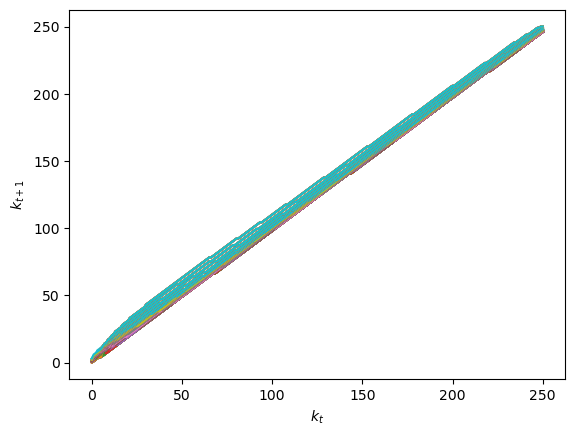

In [21]:
for i in range (n_s*n_m):
    plt.plot(kgrid,g[:,i],label='z_m='+ str(mgrid[i // n_s])+ ',' +'z_s='+ str(sgrid[i % n_s]))
# plt.plot(kgrid,kgrid,label="45 degree",color='black')
plt.xlabel("$k_t$")
plt.ylabel("$k_{t+1}$")
# plt.title('policy function')
# plt.legend()

Text(0, 0.5, '$V$')

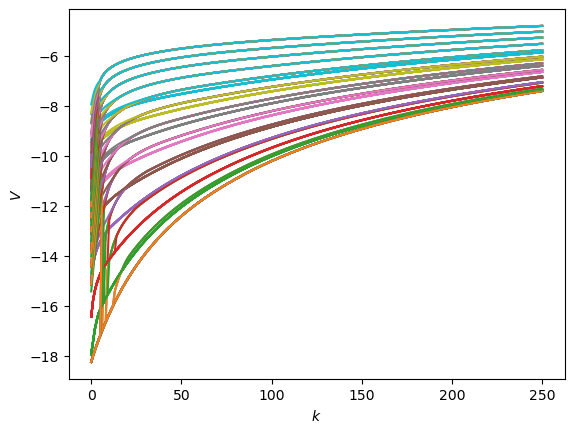

In [22]:
for i in range (n_s*n_m):
    plt.plot(kgrid,V[:,i],label='z_m='+ str(mgrid[i // n_s])+ ',' +'z_s='+ str(sgrid[i % n_s]))
plt.xlabel("$k$")
plt.ylabel("$V$")
# plt.title('policy function')
# plt.legend()

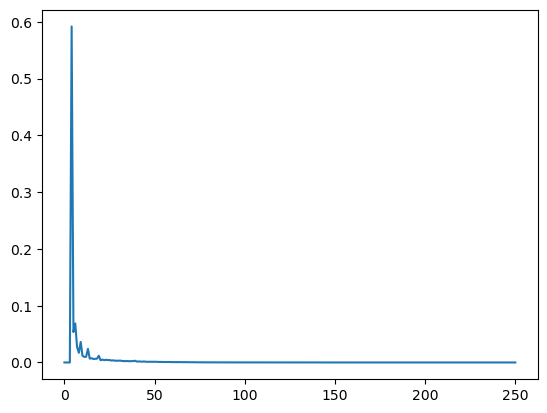

In [23]:
psi0 = np.ones((n_k * n_s*n_m))/(n_k * n_s*n_m)
QQ=transQ_sparse(g)
ss = sparse_stationary_distribution_iteration(QQ, psi0, tol=1e-7)
a_dist=capital_marginal(ss)
plt.plot(kgrid,a_dist)

In [24]:
# proportion of entrepreneurs in manufacture
sss=ss.reshape((n_k, n_s*n_m))
np.sum(state_manufacture*sss)

0.017102154993489

In [25]:
# proportion of entrepreneurs in service
np.sum(state_service*sss)

0.34714940163490887

In [26]:
# proportion of workers
state_worker = np.ones((n_k, n_s*n_m))-state_manufacture-state_service
np.sum(state_worker*sss)

0.6357484433716185

In [27]:
capital_and_labor_and_service_and_manufacture(w,r,p_s)

(9.486362860653207,
 16.41424125277323,
 0.6357454778239249,
 2.5394436974301193,
 4.850131965491565,
 2.2823535996367417,
 1.2646582174963221,
 0.2957027356012876,
 0.0800555713268351)

## Sparse search

### given $r$ and $p_s$, find $w$ that clears labor market

In [43]:
# compute residual of each market
def equilibrium_k(w,r,p_s):
    a_supply,a_demand,l_supply,l_demand,s_supply,s_demand=capital_and_labor_and_service(w,r,p_s)
    res_k=a_supply-a_demand
    print('w=',w,'r=',r,'p_s=',p_s,'capital supply=',a_supply,'capital demand=',a_demand,'res_k=',res_k)
    return res_k
    
def equilibrium_l(w,r,p_s):
    a_supply,a_demand,l_supply,l_demand,s_supply,s_demand=capital_and_labor_and_service(w,r,p_s)
    res_l=l_supply-l_demand
    print('w=',w,'r=',r,'p_s=',p_s,'labor suply=',l_supply,'labor demand=',l_demand,'res_l=',res_l)
    return res_l

def equilibrium_s(w,r,p_s):
    a_supply,a_demand,l_supply,l_demand,s_supply,s_demand=capital_and_labor_and_service(w,r,p_s)
    res_s=s_supply-s_demand
    print('w=',w,'r=',r,'p_s=',p_s,'service suply=',s_supply,'service demand=',s_demand,'res_s=',res_s)
    return res_s

In [ ]:
## plot
from tqdm import tqdm

def labor_curve(wmin, wmax, wgrid_number,r,p_s):
    wgrid = np.linspace(wmin, wmax, wgrid_number)
    l_supply = np.zeros(wgrid_number)
    l_demand = np.zeros(wgrid_number)
    for i in tqdm(range(wgrid_number)):
        w0 = wgrid[i]
        capital_supply,capital_demand,l_supply[i],l_demand[i],service_supply,service_demand=capital_and_labor_and_service(w0,r,p_s) #capital 只是为了占位
    return wgrid, l_supply, l_demand

wgrid, labor_supply, labor_demand = labor_curve(
    wmin=1.7, wmax=1.77, wgrid_number=11,r=r,p_s=p_s
)

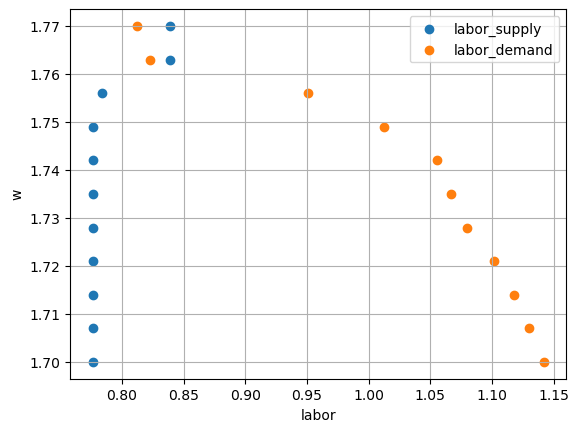

In [135]:
#plot
plt.scatter(l_supply,wgrid,label="labor_supply")
plt.scatter(l_demand,wgrid,label="labor_demand")
# plt.title('labor market')
plt.ylabel('w')
plt.xlabel('labor')
plt.legend()
plt.grid(True)

### given $p_s$, find $r$ and corresponding $w$ that clear both capital and labor markets

In [137]:
# nested bisection inner part: find equilibrium w given r and p_s
def w_update(r,p_s,tol):
    wmin = 1.5
    wmax = 2.5
    w0=1/2*(wmin+wmax)
    error = np.inf
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        res = equilibrium_l(w0,r,p_s)
        if np.abs(res) < 0.025:
            w0=w0
            break
        if res < 0:
            wmin=w0
        if res > 0:
            wmax=w0
        w0=1/2*(wmin+wmax)
        error = np.abs(wmax-wmin)
        count = count + 1
    if error > tol and np.abs(res) > 0.025:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    print("final w=", w0)
    return w0

In [142]:
from tqdm import tqdm
def capital_curve(rmin, rmax, rgrid_number,p_s):
    rgrid = np.linspace(rmin, rmax, rgrid_number)
    a_supply = np.zeros(rgrid_number)
    a_demand = np.zeros(rgrid_number)
    for i in tqdm(range(rgrid_number)):
        r0 = rgrid[i]
        w = w_update(r0,p_s,1e-5)
        a_supply[i],a_demand[i],l_supply,l_demand,a,b=capital_and_labor_and_service(w,r0,p_s) #capital 只是为了占位
        print(a_supply[i],a_demand[i])
    return rgrid, a_supply, a_demand
rgrid, k_supply, k_demand = capital_curve(
     rmin=0.065, rmax=0.075, rgrid_number=11, p_s=p_s
)

  0%|          | 0/11 [00:00<?, ?it/s]

w= 2.0 r= 0.065 p_s= 1.31 labor suply= 0.9401139488775485 labor demand= 0.27404543439266055 res_l= 0.6660685144848879
w= 1.75 r= 0.065 p_s= 1.31 labor suply= 0.8402508272082546 labor demand= 0.8167931258789425 res_l= 0.02345770132931213

Converged in 1 iterations.
final w= 1.75


  9%|▉         | 1/11 [00:30<05:04, 30.43s/it]

2.941918558534439 6.079127493765574
w= 2.0 r= 0.066 p_s= 1.31 labor suply= 0.9401176945953896 labor demand= 0.27333102730302145 res_l= 0.6667866672923681
w= 1.75 r= 0.066 p_s= 1.31 labor suply= 0.8402161359038527 labor demand= 0.8141426187739195 res_l= 0.02607351712993322
w= 1.625 r= 0.066 p_s= 1.31 labor suply= 0.7757052711677854 labor demand= 1.3037540531650116 res_l= -0.5280487819972262
w= 1.6875 r= 0.066 p_s= 1.31 labor suply= 0.776707838574432 labor demand= 1.1326054930168787 res_l= -0.3558976544424467
w= 1.71875 r= 0.066 p_s= 1.31 labor suply= 0.7769853968181175 labor demand= 1.0661826247590176 res_l= -0.2891972279409001
w= 1.734375 r= 0.066 p_s= 1.31 labor suply= 0.7771667688717225 labor demand= 1.0354570871398145 res_l= -0.258290318268092
w= 1.7421875 r= 0.066 p_s= 1.31 labor suply= 0.7773217837133886 labor demand= 1.0163627204939114 res_l= -0.23904093678052285
w= 1.74609375 r= 0.066 p_s= 1.31 labor suply= 0.8401905086983481 labor demand= 0.8189008638981988 res_l= 0.02128964480

 18%|█▊        | 2/11 [02:02<09:59, 66.57s/it]

2.9696245108237194 6.056434384508831
w= 2.0 r= 0.067 p_s= 1.31 labor suply= 0.9406675227667821 labor demand= 0.26789503547377674 res_l= 0.6727724872930054
w= 1.75 r= 0.067 p_s= 1.31 labor suply= 0.7836777354211739 labor demand= 0.9599022950747402 res_l= -0.17622455965356632
w= 1.875 r= 0.067 p_s= 1.31 labor suply= 0.8631768038098148 labor demand= 0.5853993282685827 res_l= 0.2777774755412321
w= 1.8125 r= 0.067 p_s= 1.31 labor suply= 0.8581894167609653 labor demand= 0.7007439861795883 res_l= 0.15744543058137694
w= 1.78125 r= 0.067 p_s= 1.31 labor suply= 0.8391522378075332 labor demand= 0.7972014268775177 res_l= 0.041950810930015514
w= 1.765625 r= 0.067 p_s= 1.31 labor suply= 0.8388772964144223 labor demand= 0.8197955582308101 res_l= 0.01908173818361225

Converged in 5 iterations.
final w= 1.765625


 27%|██▋       | 3/11 [03:13<09:10, 68.76s/it]

3.7750339217565463 6.148977016189538
w= 2.0 r= 0.068 p_s= 1.31 labor suply= 0.9131485467621112 labor demand= 0.3637223414607786 res_l= 0.5494262053013326
w= 1.75 r= 0.068 p_s= 1.31 labor suply= 0.7731909319389956 labor demand= 1.1129948567950434 res_l= -0.3398039248560478
w= 1.875 r= 0.068 p_s= 1.31 labor suply= 0.8586687909344004 labor demand= 0.6177535778912706 res_l= 0.2409152130431298
w= 1.8125 r= 0.068 p_s= 1.31 labor suply= 0.8581428385977641 labor demand= 0.7202866535464338 res_l= 0.13785618505133024
w= 1.78125 r= 0.068 p_s= 1.31 labor suply= 0.8389610633120584 labor demand= 0.8316840138600808 res_l= 0.007277049451977602

Converged in 4 iterations.
final w= 1.78125


 36%|███▋      | 4/11 [04:14<07:39, 65.69s/it]

4.684142920260423 6.356726612192135
w= 2.0 r= 0.069 p_s= 1.31 labor suply= 0.9099926453183587 labor demand= 0.3795293263027778 res_l= 0.5304633190155809
w= 1.75 r= 0.069 p_s= 1.31 labor suply= 0.7727412487888873 labor demand= 1.1388497943267608 res_l= -0.36610854553787353
w= 1.875 r= 0.069 p_s= 1.31 labor suply= 0.8562701689492711 labor demand= 0.6849617538119702 res_l= 0.17130841513730088
w= 1.8125 r= 0.069 p_s= 1.31 labor suply= 0.855993978184616 labor demand= 0.774736429999117 res_l= 0.08125754818549902
w= 1.78125 r= 0.069 p_s= 1.31 labor suply= 0.7710468910372158 labor demand= 1.132638080959014 res_l= -0.3615911899217982
w= 1.796875 r= 0.069 p_s= 1.31 labor suply= 0.8507833598304039 labor demand= 0.9073984939515499 res_l= -0.05661513412114605
w= 1.8046875 r= 0.069 p_s= 1.31 labor suply= 0.8509121943102426 labor demand= 0.8950976487792399 res_l= -0.044185454468997354
w= 1.80859375 r= 0.069 p_s= 1.31 labor suply= 0.855895398168708 labor demand= 0.7851186744458979 res_l= 0.07077672372

 45%|████▌     | 5/11 [07:23<11:01, 110.24s/it]

7.536927779420379 7.030269525392723
w= 2.0 r= 0.07 p_s= 1.31 labor suply= 0.9084185786578138 labor demand= 0.42811478560390454 res_l= 0.4803037930539093
w= 1.75 r= 0.07 p_s= 1.31 labor suply= 0.7709307708468647 labor demand= 1.186298850856808 res_l= -0.4153680800099433
w= 1.875 r= 0.07 p_s= 1.31 labor suply= 0.8549009118122592 labor demand= 0.7209087522590143 res_l= 0.13399215955324495
w= 1.8125 r= 0.07 p_s= 1.31 labor suply= 0.8510737377112485 labor demand= 0.8739009782014335 res_l= -0.02282724049018503

Converged in 3 iterations.
final w= 1.8125


 55%|█████▍    | 6/11 [08:16<07:33, 90.63s/it] 

7.502021427307967 6.86152734234015
w= 2.0 r= 0.071 p_s= 1.31 labor suply= 0.9040464969651356 labor demand= 0.5102326626694227 res_l= 0.39381383429571293
w= 1.75 r= 0.071 p_s= 1.31 labor suply= 0.7657886732979372 labor demand= 1.2858369542711099 res_l= -0.5200482809731727
w= 1.875 r= 0.071 p_s= 1.31 labor suply= 0.851038935059372 labor demand= 0.8071025316684249 res_l= 0.043936403390947065
w= 1.8125 r= 0.071 p_s= 1.31 labor suply= 0.8485064687805439 labor demand= 0.9257135900633997 res_l= -0.07720712128285578
w= 1.84375 r= 0.071 p_s= 1.31 labor suply= 0.8485502115653556 labor demand= 0.8788747220293934 res_l= -0.030324510464037835
w= 1.859375 r= 0.071 p_s= 1.31 labor suply= 0.8485883745435956 labor demand= 0.8500045579369069 res_l= -0.0014161833933112877

Converged in 5 iterations.
final w= 1.859375


 64%|██████▎   | 7/11 [09:37<05:49, 87.38s/it]

9.164111560820027 6.916447633868222
w= 2.0 r= 0.072 p_s= 1.31 labor suply= 0.9015804526499761 labor demand= 0.5520806653088537 res_l= 0.3494997873411224
w= 1.75 r= 0.072 p_s= 1.31 labor suply= 0.7654189083185751 labor demand= 1.3091786692649539 res_l= -0.5437597609463788
w= 1.875 r= 0.072 p_s= 1.31 labor suply= 0.8483353213614951 labor demand= 0.8572236257534017 res_l= -0.008888304391906576

Converged in 2 iterations.
final w= 1.875


 73%|███████▎  | 8/11 [10:29<03:48, 76.22s/it]

11.972879796565715 7.132295943041353
w= 2.0 r= 0.073 p_s= 1.31 labor suply= 0.8986583871828675 labor demand= 0.5856943439204217 res_l= 0.31296404326244576
w= 1.75 r= 0.073 p_s= 1.31 labor suply= 0.7618687182331856 labor demand= 1.3574362619803224 res_l= -0.5955675437471368
w= 1.875 r= 0.073 p_s= 1.31 labor suply= 0.8448330130075987 labor demand= 0.897869162238718 res_l= -0.05303614923111932
w= 1.9375 r= 0.073 p_s= 1.31 labor suply= 0.8485621963494493 labor demand= 0.779350130999082 res_l= 0.06921206535036728
w= 1.90625 r= 0.073 p_s= 1.31 labor suply= 0.8483663228978308 labor demand= 0.8232963988795662 res_l= 0.025069924018264578
w= 1.890625 r= 0.073 p_s= 1.31 labor suply= 0.8452179787548569 labor demand= 0.872385637018479 res_l= -0.027167658263622108
w= 1.8984375 r= 0.073 p_s= 1.31 labor suply= 0.8483381746774116 labor demand= 0.8363952677103479 res_l= 0.011942906967063682

Converged in 6 iterations.
final w= 1.8984375


 82%|████████▏ | 9/11 [12:31<03:01, 90.61s/it]

14.79306469836708 7.089639530462776
w= 2.0 r= 0.074 p_s= 1.31 labor suply= 0.8986596737281694 labor demand= 0.594640332118243 res_l= 0.3040193416099264
w= 1.75 r= 0.074 p_s= 1.31 labor suply= 0.7614311782238422 labor demand= 1.3764178344457847 res_l= -0.6149866562219425
w= 1.875 r= 0.074 p_s= 1.31 labor suply= 0.8448333339453932 labor demand= 0.9082425936330755 res_l= -0.0634092596876823
w= 1.9375 r= 0.074 p_s= 1.31 labor suply= 0.848562196173849 labor demand= 0.7864927077278128 res_l= 0.062069488446036214
w= 1.90625 r= 0.074 p_s= 1.31 labor suply= 0.844862012922509 labor demand= 0.8582814095273689 res_l= -0.013419396604859912

Converged in 4 iterations.
final w= 1.90625


 91%|█████████ | 10/11 [14:04<01:31, 91.35s/it]

18.632924257982204 7.303119878796064
w= 2.0 r= 0.075 p_s= 1.31 labor suply= 0.8986599771834544 labor demand= 0.5998086303853861 res_l= 0.29885134679806824
w= 1.75 r= 0.075 p_s= 1.31 labor suply= 0.7622635477650841 labor demand= 1.381267183625784 res_l= -0.6190036358606998
w= 1.875 r= 0.075 p_s= 1.31 labor suply= 0.844837118743217 labor demand= 0.9146682536493256 res_l= -0.0698311349061086
w= 1.9375 r= 0.075 p_s= 1.31 labor suply= 0.8485626833924242 labor demand= 0.7906246932867146 res_l= 0.05793799010570966
w= 1.90625 r= 0.075 p_s= 1.31 labor suply= 0.8449597323814162 labor demand= 0.8643611890954452 res_l= -0.01940145671402904

Converged in 4 iterations.
final w= 1.90625


100%|██████████| 11/11 [15:39<00:00, 85.38s/it]

23.52120460146468 7.376432381822564


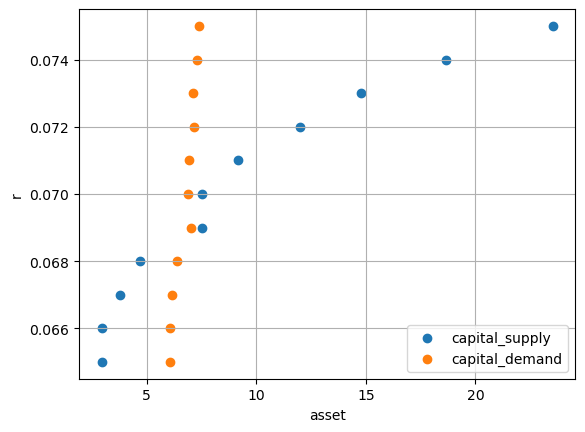

In [143]:
# Plot
plt.scatter(k_supply,rgrid,label="capital_supply")
plt.scatter(k_demand,rgrid,label="capital_demand")
# plt.title('capital market with w=w_eq')
plt.ylabel('r')
# plt.xlim(0,2)
plt.xlabel('asset')
plt.legend()
plt.grid(True)

### find $p_s$ and corresponding $r$ and $w$ that clear service, capital and labor markets

In [152]:
# nested bisection middle part: find equilibrium r given p_s
def r_update(p_s,tol):
    rmin=0.06
    rmax=0.08
    r0=1/2*(rmin+rmax)
    error = np.inf
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        w = w_update(r0,p_s,1e-4)
        res_k = equilibrium_k(w,r0,p_s)
        if np.abs(res_k) < 0.1:
            r0=r0
            break
        if res_k < 0: 
            rmin=r0
        if res_k > 0:
            rmax=r0
        r0 = 1/2*(rmin+rmax)
        error = np.abs(rmax-rmin)
        count = count + 1
    if error > tol and np.abs(res_k) > 0.1:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return r0

In [153]:
from tqdm import tqdm
# capital 之前 工资要稳定：劳动力市场要出清
def service_curve(pmin, pmax, pgrid_number):
    pgrid = np.linspace(pmin, pmax, pgrid_number)
    s_supply = np.zeros(pgrid_number)
    s_demand = np.zeros(pgrid_number)
    for i in tqdm(range(pgrid_number)):
        p0 = pgrid[i]
        r= r_update(p0,1e-4)
        w = w_update(r,p0,1e-4)
        a,b,l_supply,l_demand,s_supply[i],s_demand[i],=capital_and_labor_and_service(w,r,p0) #capital 只是为了占位
    return pgrid, s_supply, s_demand

pgrid, s_supply, s_demand = service_curve(
     pmin=1.2, pmax=1.4, pgrid_number=11
)


  0%|          | 0/11 [00:00<?, ?it/s]

w= 2.0 r= 0.07 p_s= 1.2 labor suply= 0.9404783036768942 labor demand= 0.2570031493575284 res_l= 0.6834751543193658
w= 1.75 r= 0.07 p_s= 1.2 labor suply= 0.8481831390279324 labor demand= 0.7751104320423966 res_l= 0.0730727069855358
w= 1.625 r= 0.07 p_s= 1.2 labor suply= 0.8399601709795789 labor demand= 1.0936919991357326 res_l= -0.2537318281561537
w= 1.6875 r= 0.07 p_s= 1.2 labor suply= 0.8447655472477411 labor demand= 0.9126230943270536 res_l= -0.06785754707931246
w= 1.71875 r= 0.07 p_s= 1.2 labor suply= 0.8449003024047933 labor demand= 0.8577978074939732 res_l= -0.012897505089179861

Converged in 4 iterations.
final w= 1.71875
w= 1.71875 r= 0.07 p_s= 1.2 capital supply= 9.381416638524893 capital demand= 6.448270573555357 res_k= 2.9331460649695362
w= 2.0 r= 0.065 p_s= 1.2 labor suply= 0.9682848593050791 labor demand= 0.12221504778435528 res_l= 0.8460698115207238
w= 1.75 r= 0.065 p_s= 1.2 labor suply= 0.910618543204023 labor demand= 0.3814634118978653 res_l= 0.5291551313061578
w= 1.625 

  9%|▉         | 1/11 [05:59<59:54, 359.46s/it]

w= 2.0 r= 0.07 p_s= 1.22 labor suply= 0.9404681997435329 labor demand= 0.2682353794727296 res_l= 0.6722328202708033
w= 1.75 r= 0.07 p_s= 1.22 labor suply= 0.8483015613302095 labor demand= 0.8111120560338254 res_l= 0.037189505296384096
w= 1.625 r= 0.07 p_s= 1.22 labor suply= 0.8394350548959683 labor demand= 1.1707288170032188 res_l= -0.3312937621072506
w= 1.6875 r= 0.07 p_s= 1.22 labor suply= 0.8447399883195164 labor demand= 0.9593058614947907 res_l= -0.11456587317527434
w= 1.71875 r= 0.07 p_s= 1.22 labor suply= 0.8448891926385002 labor demand= 0.8993354799782985 res_l= -0.054446287339798394
w= 1.734375 r= 0.07 p_s= 1.22 labor suply= 0.8451682189994478 labor demand= 0.8673831443859604 res_l= -0.022214925386512596

Converged in 5 iterations.
final w= 1.734375
w= 1.734375 r= 0.07 p_s= 1.22 capital supply= 8.961505706894101 capital demand= 6.57125018506419 res_k= 2.3902555218299115
w= 2.0 r= 0.065 p_s= 1.22 labor suply= 0.9660513539780056 labor demand= 0.1363993987533428 res_l= 0.829651955

 18%|█▊        | 2/11 [22:30<1:49:36, 730.74s/it]

w= 2.0 r= 0.07 p_s= 1.24 labor suply= 0.9074116426088399 labor demand= 0.3714460447590806 res_l= 0.5359655978497593
w= 1.75 r= 0.07 p_s= 1.24 labor suply= 0.8482702707489276 labor demand= 0.853755435035399 res_l= -0.005485164286471389

Converged in 1 iterations.
final w= 1.75
w= 1.75 r= 0.07 p_s= 1.24 capital supply= 8.390181405254346 capital demand= 6.529764228568259 res_k= 1.860417176686087
w= 2.0 r= 0.065 p_s= 1.24 labor suply= 0.9656720442460873 labor demand= 0.14862716169748927 res_l= 0.8170448825485981
w= 1.75 r= 0.065 p_s= 1.24 labor suply= 0.9090691065182993 labor demand= 0.444780156560287 res_l= 0.4642889499580123
w= 1.625 r= 0.065 p_s= 1.24 labor suply= 0.8375326147190755 labor demand= 0.8512905216019908 res_l= -0.013757906882915338

Converged in 2 iterations.
final w= 1.625
w= 1.625 r= 0.065 p_s= 1.24 capital supply= 2.993267719764165 capital demand= 5.905025499834202 res_k= -2.9117577800700367
w= 2.0 r= 0.0675 p_s= 1.24 labor suply= 0.9135452750340285 labor demand= 0.295965

 27%|██▋       | 3/11 [38:08<1:50:05, 825.73s/it]

w= 2.0 r= 0.07 p_s= 1.26 labor suply= 0.9073320518859804 labor demand= 0.39182161205814947 res_l= 0.515510439827831
w= 1.75 r= 0.07 p_s= 1.26 labor suply= 0.8482332839757669 labor demand= 0.9005034175308126 res_l= -0.05227013355504573
w= 1.875 r= 0.07 p_s= 1.26 labor suply= 0.8533967206766944 labor demand= 0.6640212421834059 res_l= 0.1893754784932885
w= 1.8125 r= 0.07 p_s= 1.26 labor suply= 0.8512252165239576 labor demand= 0.7560073529304544 res_l= 0.09521786359350315
w= 1.78125 r= 0.07 p_s= 1.26 labor suply= 0.8483281833664144 labor demand= 0.8502093175357629 res_l= -0.0018811341693485417

Converged in 4 iterations.
final w= 1.78125
w= 1.78125 r= 0.07 p_s= 1.26 capital supply= 8.329349690575382 capital demand= 6.627613524534393 res_k= 1.7017361660409893
w= 2.0 r= 0.065 p_s= 1.26 labor suply= 0.9454820047215589 labor demand= 0.22006702372496947 res_l= 0.7254149809965894
w= 1.75 r= 0.065 p_s= 1.26 labor suply= 0.8580761175749851 labor demand= 0.686280983216491 res_l= 0.17179513435849414

 36%|███▋      | 4/11 [52:07<1:36:56, 830.95s/it]

w= 2.0 r= 0.07 p_s= 1.28 labor suply= 0.907278390676493 labor demand= 0.4158289680955615 res_l= 0.49144942258093144
w= 1.75 r= 0.07 p_s= 1.28 labor suply= 0.8480868896514686 labor demand= 0.9486999681945861 res_l= -0.10061307854311752
w= 1.875 r= 0.07 p_s= 1.28 labor suply= 0.8533637447620239 labor demand= 0.6980008157892954 res_l= 0.15536292897272852
w= 1.8125 r= 0.07 p_s= 1.28 labor suply= 0.8511354430163993 labor demand= 0.7999497786881856 res_l= 0.0511856643282137
w= 1.78125 r= 0.07 p_s= 1.28 labor suply= 0.8482301673937815 labor demand= 0.8975110843690138 res_l= -0.04928091697523229
w= 1.796875 r= 0.07 p_s= 1.28 labor suply= 0.8510164427874741 labor demand= 0.8213855433844597 res_l= 0.029630899403014443
w= 1.7890625 r= 0.07 p_s= 1.28 labor suply= 0.8508911254532742 labor demand= 0.8358089577649488 res_l= 0.015082167688325376

Converged in 6 iterations.
final w= 1.7890625
w= 1.7890625 r= 0.07 p_s= 1.28 capital supply= 7.39951216198157 capital demand= 6.452610682788945 res_k= 0.9469

 45%|████▌     | 5/11 [57:45<1:05:17, 652.92s/it]

w= 2.0 r= 0.07 p_s= 1.2999999999999998 labor suply= 0.9084723474780159 labor demand= 0.41393189410310927 res_l= 0.4945404533749066
w= 1.75 r= 0.07 p_s= 1.2999999999999998 labor suply= 0.7697231919173158 labor demand= 1.1874291121731129 res_l= -0.4177059202557971
w= 1.875 r= 0.07 p_s= 1.2999999999999998 labor suply= 0.8549224695919706 labor demand= 0.7048924053281829 res_l= 0.15003006426378773
w= 1.8125 r= 0.07 p_s= 1.2999999999999998 labor suply= 0.8510969112238047 labor demand= 0.8516966155806608 res_l= -0.0005997043568560789

Converged in 3 iterations.
final w= 1.8125
w= 1.8125 r= 0.07 p_s= 1.2999999999999998 capital supply= 7.422430020051656 capital demand= 6.707639188294226 res_k= 0.7147908317574299
w= 2.0 r= 0.065 p_s= 1.2999999999999998 labor suply= 0.9440940335821834 labor demand= 0.25492733116563543 res_l= 0.689166702416548
w= 1.75 r= 0.065 p_s= 1.2999999999999998 labor suply= 0.8407143175573898 labor demand= 0.7853134316659784 res_l= 0.055400885891411344
w= 1.625 r= 0.065 p_s=

 55%|█████▍    | 6/11 [1:06:23<50:35, 607.05s/it]

w= 2.0 r= 0.07 p_s= 1.3199999999999998 labor suply= 0.8577697962073169 labor demand= 0.5571330117644351 res_l= 0.3006367844428818
w= 1.75 r= 0.07 p_s= 1.3199999999999998 labor suply= 0.7708812310405494 labor demand= 1.2185756121621705 res_l= -0.4476943811216211
w= 1.875 r= 0.07 p_s= 1.3199999999999998 labor suply= 0.8547894776986201 labor demand= 0.7477170066718688 res_l= 0.10707247102675133
w= 1.8125 r= 0.07 p_s= 1.3199999999999998 labor suply= 0.8509970084933611 labor demand= 0.8981790924800731 res_l= -0.047182083986711976
w= 1.84375 r= 0.07 p_s= 1.3199999999999998 labor suply= 0.8531151923690885 labor demand= 0.8285103637189651 res_l= 0.024604828650123367

Converged in 4 iterations.
final w= 1.84375
w= 1.84375 r= 0.07 p_s= 1.3199999999999998 capital supply= 7.342928514877681 capital demand= 6.6287113184519 res_k= 0.7142171964257802
w= 2.0 r= 0.065 p_s= 1.3199999999999998 labor suply= 0.9394275202495539 labor demand= 0.28493310191223153 res_l= 0.6544944183373224
w= 1.75 r= 0.065 p_s=

 64%|██████▎   | 7/11 [1:13:29<36:31, 547.83s/it]

w= 2.0 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.857659937410364 labor demand= 0.5896841256143596 res_l= 0.2679758117960044
w= 1.75 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.7708155745179767 labor demand= 1.287647169962028 res_l= -0.5168315954440513
w= 1.875 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.8547144510714986 labor demand= 0.787278730240831 res_l= 0.06743572083066762
w= 1.8125 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.7713833541165651 labor demand= 1.1495879796925985 res_l= -0.3782046255760334
w= 1.84375 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.8545405078585309 labor demand= 0.8364183142765409 res_l= 0.018122193581989965

Converged in 4 iterations.
final w= 1.84375
w= 1.84375 r= 0.07 p_s= 1.3399999999999999 capital supply= 6.591842943754897 capital demand= 6.59785681004992 res_k= -0.006013866295022652

Converged in 0 iterations.
w= 2.0 r= 0.07 p_s= 1.3399999999999999 labor suply= 0.857659937410364 labor demand= 0.5896841256143596 res_l= 0.26797581179600

 73%|███████▎  | 8/11 [1:15:32<20:37, 412.61s/it]

w= 2.0 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.8575299896430608 labor demand= 0.6326882865163233 res_l= 0.22484170312673757
w= 1.75 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.7705976356013364 labor demand= 1.3653826713064436 res_l= -0.5947850357051072
w= 1.875 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.77481486535469 labor demand= 1.027052924029247 res_l= -0.25223805867455695
w= 1.9375 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.8549922109558061 labor demand= 0.7486755833547044 res_l= 0.10631662760110172
w= 1.90625 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.8547772971578427 labor demand= 0.7929594628743468 res_l= 0.061817834283495854
w= 1.890625 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.854738875986799 labor demand= 0.812285342961486 res_l= 0.04245353302531296
w= 1.8828125 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.8546226364086891 labor demand= 0.8218188412744966 res_l= 0.032803795134192515
w= 1.87890625 r= 0.07 p_s= 1.3599999999999999 labor suply= 0.854

 82%|████████▏ | 9/11 [1:18:36<11:22, 341.18s/it]

w= 2.0 r= 0.07 p_s= 1.38 labor suply= 0.8574814800377316 labor demand= 0.6748081320974558 res_l= 0.1826733479402758
w= 1.75 r= 0.07 p_s= 1.38 labor suply= 0.770484078459908 labor demand= 1.4506712059419906 res_l= -0.6801871274820827
w= 1.875 r= 0.07 p_s= 1.38 labor suply= 0.7746023285056007 labor demand= 1.0991186542397742 res_l= -0.32451632573417344
w= 1.9375 r= 0.07 p_s= 1.38 labor suply= 0.8532796032265696 labor demand= 0.8321886223196893 res_l= 0.02109098090688033

Converged in 3 iterations.
final w= 1.9375
w= 1.9375 r= 0.07 p_s= 1.38 capital supply= 7.393551922856665 capital demand= 6.973801350242398 res_k= 0.4197505726142676
w= 2.0 r= 0.065 p_s= 1.38 labor suply= 0.9072416244709678 labor demand= 0.4627214403314251 res_l= 0.4445201841395427
w= 1.75 r= 0.065 p_s= 1.38 labor suply= 0.7822148581283896 labor demand= 1.2303168089747774 res_l= -0.4481019508463877
w= 1.875 r= 0.065 p_s= 1.38 labor suply= 0.8504120282155971 labor demand= 0.7532041058384721 res_l= 0.09720792237712506
w= 1.

 91%|█████████ | 10/11 [1:34:11<08:44, 524.73s/it]

w= 2.0 r= 0.07 p_s= 1.4 labor suply= 0.8573820601060984 labor demand= 0.7141127065778342 res_l= 0.1432693535282642
w= 1.75 r= 0.07 p_s= 1.4 labor suply= 0.7702495604716043 labor demand= 1.541976125455458 res_l= -0.7717265649838537
w= 1.875 r= 0.07 p_s= 1.4 labor suply= 0.7744936096514337 labor demand= 1.1563087059186785 res_l= -0.38181509626724486
w= 1.9375 r= 0.07 p_s= 1.4 labor suply= 0.7748884775022878 labor demand= 1.0464762765737834 res_l= -0.27158779907149555
w= 1.96875 r= 0.07 p_s= 1.4 labor suply= 0.8572665783691253 labor demand= 0.7499863378296971 res_l= 0.1072802405394282
w= 1.953125 r= 0.07 p_s= 1.4 labor suply= 0.7736801750023682 labor demand= 1.0427604767113299 res_l= -0.2690803017089617
w= 1.9609375 r= 0.07 p_s= 1.4 labor suply= 0.8571080876708015 labor demand= 0.7694851949591959 res_l= 0.08762289271160562
w= 1.95703125 r= 0.07 p_s= 1.4 labor suply= 0.8452197174018049 labor demand= 0.8053231028901692 res_l= 0.03989661451163573
w= 1.955078125 r= 0.07 p_s= 1.4 labor suply= 

100%|██████████| 11/11 [1:48:41<00:00, 592.90s/it]


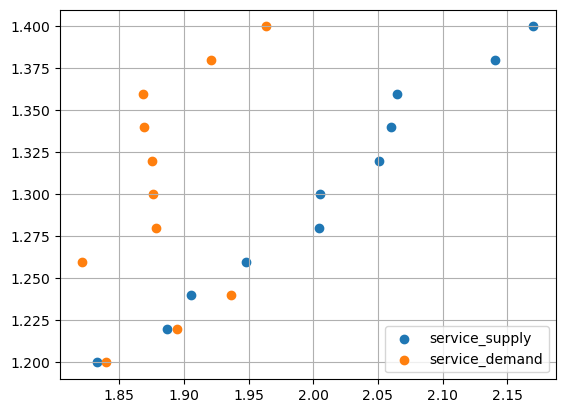

In [154]:
# Plot
plt.scatter(s_supply,pgrid,label="service_supply")
plt.scatter(s_demand,pgrid,label="service_demand")
# plt.title('capital market with w=w_eq')
# plt.ylabel('r')
# plt.xlim(5,5.2)
# plt.xlabel('asset')
plt.legend()
plt.grid(True)

In [156]:
s_supply-s_demand

array([-0.00687255, -0.00719011, -0.03051   ,  0.12676582,  0.1261305 ,
        0.12893336,  0.17523225,  0.19089574,  0.19639722,  0.22025677,
        0.20638344])

## Precise search

In [54]:
# Complete cede for nested bisection method

# nested bisection inner part: find equilibrium w given r and p_s
def w_update(r,p_s,tol):
    wmin = 1.5
    wmax = 2.5
    w0=1/2*(wmin+wmax)
    error = np.inf
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        res = equilibrium_l(w0,r,p_s)
        if np.abs(res) < 0.025:
            w0=w0
            break
        if res < 0:
            wmin=w0
        if res > 0:
            wmax=w0
        w0=1/2*(wmin+wmax)
        error = np.abs(wmax-wmin)
        count = count + 1
    if error > tol and np.abs(res) > 0.025:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    print("final w=", w0)
    return w0

# nested bisection middle part: find equilibrium r given p_s
def r_update(p_s,tol):
    rmin=0.05
    rmax=0.08
    r0=1/2*(rmin+rmax)
    error = np.inf
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        w = w_update(r0,p_s,1e-4)
        res_k = equilibrium_k(w,r0,p_s)
        if np.abs(res_k) < 0.1:
            r0=r0
            break
        if res_k < 0: 
            rmin=r0
        if res_k > 0:
            rmax=r0
        r0 = 1/2*(rmin+rmax)
        error = np.abs(rmax-rmin)
        count = count + 1
    if error > tol and np.abs(res_k) > 0.1:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return r0

# nested bisection outer part: find equilibrium p_s
def p_iteration(tol):
    pmin=1.1
    pmax=1.3
    p0=0.5*(pmin+pmax)
    error = np.inf
    count = 0
    max_iter = 1000
    while count < max_iter and error > tol:
        r= r_update(p0,1e-4)
        w = w_update(r,p0,1e-4)
        res_s = equilibrium_s(w,r,p0)
        if res_s < 1e-3:
            p0=p0
            break
        if res_s > 0:
            pmax = p0
        if res_s < 0:
            pmin = p0
        p0=0.5*(pmin+pmax)
        error = np.abs(pmax-pmin)
        count = count + 1
        print('pmin=',pmin,'pmax=',pmax,'p0=',p0,'r=',r,'w=',w,'iteration times=',count,'res=',res_s)
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return p0
   

In [55]:
start_time = timeit.default_timer()
ps_eq = p_iteration(5*1e-3)
print("The time difference is :", timeit.default_timer() - start_time)

w= 2.0 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.9682848593050791 labor demand= 0.12221504778435534 res_l= 0.8460698115207238
w= 1.75 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.910618543204023 labor demand= 0.3814634118978655 res_l= 0.5291551313061575
w= 1.625 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.8623238631979939 labor demand= 0.6626745749451421 res_l= 0.19964928825285178
w= 1.5625 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.8404388544430842 labor demand= 0.8333739700745726 res_l= 0.007064884368511604

Converged in 3 iterations.
final w= 1.5625
w= 1.5625 r= 0.065 p_s= 1.2000000000000002 capital supply= 2.880738202215436 capital demand= 5.563907893536371 res_k= -2.6831696913209346
w= 2.0 r= 0.07250000000000001 p_s= 1.2000000000000002 labor suply= 0.9313823079908367 labor demand= 0.37394938617091156 res_l= 0.5574329218199251
w= 1.75 r= 0.07250000000000001 p_s= 1.2000000000000002 labor suply= 0.8895732271553923 labor demand= 0.7787957108356968 res_l= 0.1107775163

In [56]:
r_eq = r_update(ps_eq ,1e-4)
w_eq = w_update(r_eq,ps_eq ,1e-4)

w= 2.0 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.9682848593050791 labor demand= 0.12221504778435534 res_l= 0.8460698115207238
w= 1.75 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.910618543204023 labor demand= 0.3814634118978655 res_l= 0.5291551313061575
w= 1.625 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.8623238631979939 labor demand= 0.6626745749451421 res_l= 0.19964928825285178
w= 1.5625 r= 0.065 p_s= 1.2000000000000002 labor suply= 0.8404388544430842 labor demand= 0.8333739700745726 res_l= 0.007064884368511604

Converged in 3 iterations.
final w= 1.5625
w= 1.5625 r= 0.065 p_s= 1.2000000000000002 capital supply= 2.880738202215436 capital demand= 5.563907893536371 res_k= -2.6831696913209346
w= 2.0 r= 0.07250000000000001 p_s= 1.2000000000000002 labor suply= 0.9313823079908367 labor demand= 0.37394938617091156 res_l= 0.5574329218199251
w= 1.75 r= 0.07250000000000001 p_s= 1.2000000000000002 labor suply= 0.8895732271553923 labor demand= 0.7787957108356968 res_l= 0.1107775163

In [57]:
equilibrium_s(w_eq,r_eq,ps_eq)

w= 1.625 r= 0.0678125 p_s= 1.2000000000000002 service suply= 1.832543901743975 service demand= 1.8394164503748998 res_s= -0.00687254863092468


-0.00687254863092468

In [58]:
equilibrium_k(w_eq,r_eq,ps_eq)

w= 1.625 r= 0.0678125 p_s= 1.2000000000000002 capital supply= 5.865318860751749 capital demand= 5.940740856573977 res_k= -0.07542199582222775


-0.07542199582222775

In [59]:
equilibrium_l(w_eq,r_eq,ps_eq)

w= 1.625 r= 0.0678125 p_s= 1.2000000000000002 labor suply= 0.8524691458172311 labor demand= 0.855420785386736 res_l= -0.002951639569504949


-0.002951639569504949

## Final check: manufacture goods

In [60]:
capital_supply,k_demand,labor_supply,l_demand,service_supply,service_demand,m_supply,m_demand,fixed_cost=capital_and_labor_and_service_and_manufacture(w_eq,r_eq,ps_eq)

In [61]:
print('m-goods_demand=',m_demand,'m-goods_supply=',m_supply,'capital_supply=',capital_supply,'capital_demand=',k_demand,'fixed cost=',fixed_cost)

m-goods_demand= 0.21830436993460686 m-goods_supply= 0.6378019633224097 capital_supply= 5.865318860751749 capital_demand= 5.940740856573977 fixed cost= 0.0421144141802898


In [62]:
m_supply-m_demand-delta*capital_supply-(1+r_eq)*fixed_cost

0.02260816385080712

In [63]:
m_supply-m_demand-delta*k_demand-(1+r_eq)*fixed_cost

0.018082844101473497